In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from arrakis_nd import *
import seaborn as sn
import h5flow


In [3]:
event = 2

In [4]:
arr = np.load('../test_mrun4_full.npz', allow_pickle=True)

In [5]:
arr.files

['data', 'meta']

In [6]:
arr['meta']

array({'who_created': 'mnuland', 'when_created': '12-10-2023-05:32:33', 'where_created': 'login05', 'det_features': {'x': 0, 'y': 1, 'z': 2, 'Q': 3}, 'mc_features': {'t_drift': 0, 'ts_pps': 1, 'E': 2}, 'classes': {'source': 0, 'topology': 1, 'particle': 2, 'physics': 3}, 'clusters': {'topology': 0, 'particle': 1, 'physics': 2}, 'source_labels': {-1: 'undefined', 0: 'noise', 1: 'cosmics', 2: 'beam', 3: 'radiological', 4: 'pns', 5: 'hepevt'}, 'topology_labels': {-1: 'undefined', 0: 'noise', 1: 'blip', 2: 'track', 3: 'shower'}, 'particle_labels': {-1: 'undefined', 0: 'noise', 11: 'electron', -11: 'positron', 12: 'electron_neutrino', -12: 'anti-electron_neutrino', 13: 'muon', -13: 'anti-muon', 14: 'muon_neutrino', -14: 'anti-muon_neutrino', 15: 'tauon', -15: 'anti-tauon', 16: 'tauon_neutrino', -16: 'anti-tauon_neutrino', 22: 'gamma', 111: 'pion0', 211: 'pion_plus', -211: 'pion_minus', 311: 'kaon0', 321: 'kaon_plus', -321: 'kaon_minus', 2112: 'neutron', -2112: 'anti-neutron', 2212: 'proton'

In [7]:
x = arr['data'].tolist()[event].data['x']
y = arr['data'].tolist()[event].data['y']

In [8]:
particle_labels = arr['data'].tolist()[event].data['particle_label']
physics_labels = arr['data'].tolist()[event].data['physics_label']
topology_labels = arr['data'].tolist()[event].data['topology_label']

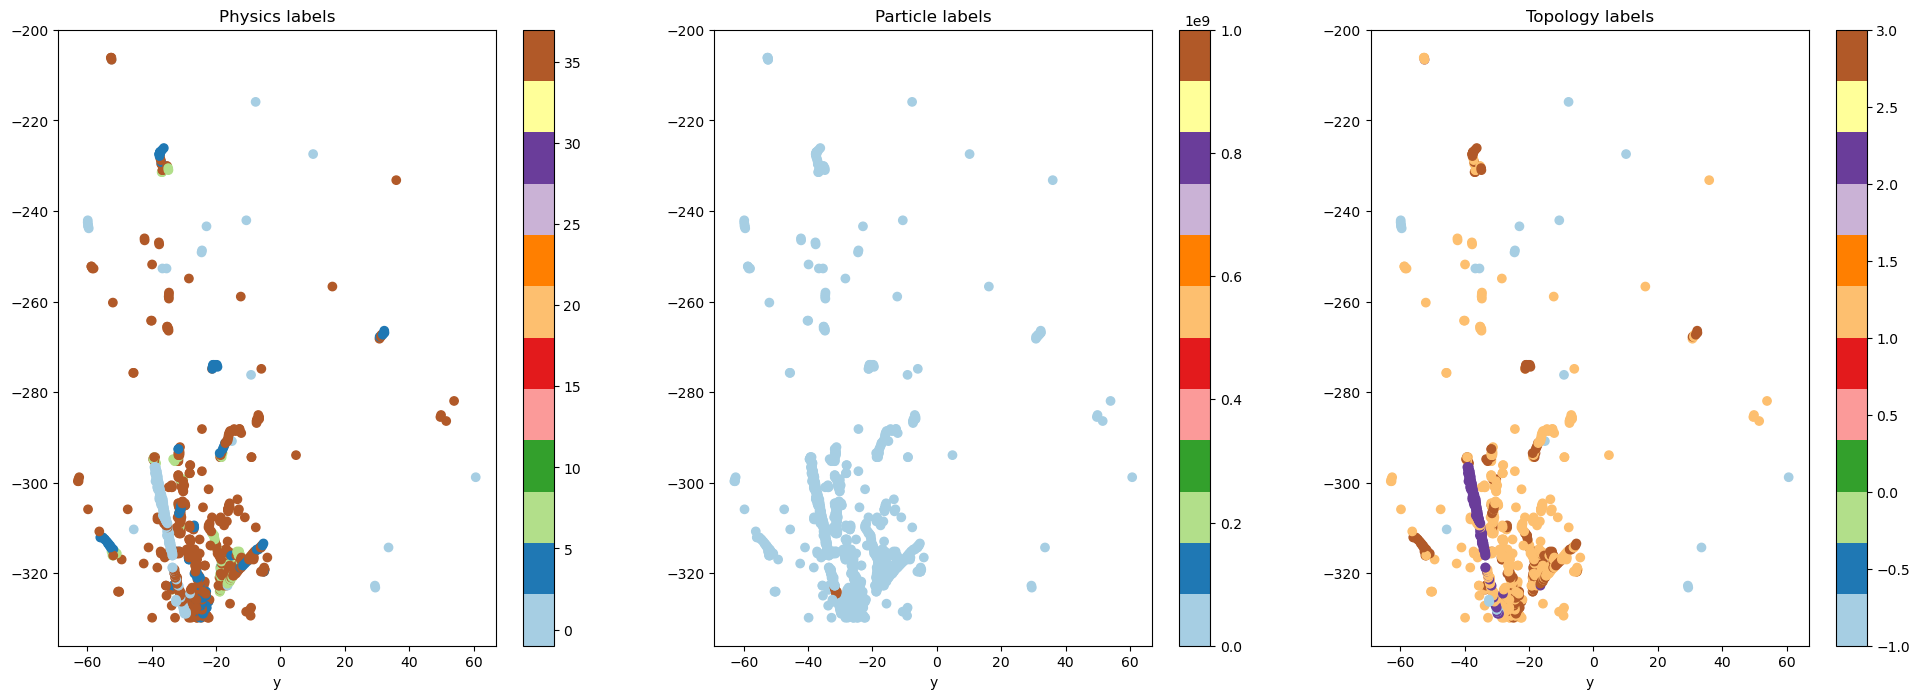

In [9]:
fig, axs = plt.subplots(1, 3, figsize=(24, 8))
plot1 = axs[0].scatter(x,y, c=physics_labels, cmap='Paired')
axs[0].set_title('Physics labels')
axs[0].set_xlabel('x')
axs[0].set_xlabel('y')
plt.colorbar(plot1, ax=axs[0])
plot2 = axs[1].scatter(x,y, c=particle_labels, cmap='Paired')
axs[1].set_title('Particle labels')
axs[1].set_xlabel('x')
axs[1].set_xlabel('y')
plt.colorbar(plot2, ax=axs[1])
plot3 = axs[2].scatter(x,y, c=topology_labels, cmap='Paired')
axs[2].set_title('Topology labels')
axs[2].set_xlabel('x')
axs[2].set_xlabel('y')
plt.colorbar(plot3, ax=axs[2])

plt.show()

In [10]:
arr['meta'].tolist()['particle_labels']

{-1: 'undefined',
 0: 'noise',
 11: 'electron',
 -11: 'positron',
 12: 'electron_neutrino',
 -12: 'anti-electron_neutrino',
 13: 'muon',
 -13: 'anti-muon',
 14: 'muon_neutrino',
 -14: 'anti-muon_neutrino',
 15: 'tauon',
 -15: 'anti-tauon',
 16: 'tauon_neutrino',
 -16: 'anti-tauon_neutrino',
 22: 'gamma',
 111: 'pion0',
 211: 'pion_plus',
 -211: 'pion_minus',
 311: 'kaon0',
 321: 'kaon_plus',
 -321: 'kaon_minus',
 2112: 'neutron',
 -2112: 'anti-neutron',
 2212: 'proton',
 -2212: 'anti-proton',
 1000010020: 'deuteron',
 1000010030: 'triton',
 1000020040: 'alpha'}

In [11]:
df = pd.DataFrame(columns=['x', 'y', 'z', 'particle_label', 'physics_label', 'topology_label'])
particle_label_df = pd.DataFrame.from_dict(arr['meta'].tolist()['particle_labels'], orient='index', columns=['particle_label_text']).reset_index()
physics_label_df = pd.DataFrame.from_dict(arr['meta'].tolist()['physics_labels'], orient='index', columns=['physics_label_text']).reset_index()
topology_label_df = pd.DataFrame.from_dict(arr['meta'].tolist()['topology_labels'], orient='index', columns=['topology_label_text']).reset_index()

In [12]:
physics_label_df

,index,physics_label_text
0,-1,undefined
1,0,noise
2,1,mip_ionization
3,2,hip_ionization
4,3,delta_electron
5,4,michel_electron
6,5,electron_shower
7,6,positron_shower
8,7,photon_shower
9,8,neutron_capture_gamma_474


In [13]:
df['x'] = arr['data'].tolist()[event].data['x']
df['y'] = arr['data'].tolist()[event].data['y']
df['z'] = arr['data'].tolist()[event].data['z']
df['particle_label'] = arr['data'].tolist()[event].data['particle_label']
df['physics_label'] = arr['data'].tolist()[event].data['physics_label']
df['topology_label'] = arr['data'].tolist()[event].data['topology_label']

In [14]:
df_1 = df.merge(particle_label_df, how='left', left_on='particle_label', right_on='index')
df_2 = df_1.merge(physics_label_df, how='left', left_on='physics_label', right_on='index')
df_3 = df_2.merge(topology_label_df, how='left', left_on='topology_label', right_on='index')
df_1.head()

,x,y,z,particle_label,physics_label,topology_label,index,particle_label_text
0,-35.386429,-324.976898,1244.995117,11.0,37.0,1.0,11.0,electron
1,49.689171,-285.514313,1246.768677,11.0,37.0,1.0,11.0,electron
2,49.886211,-285.070892,1246.768677,11.0,37.0,1.0,11.0,electron
3,-10.636185,-328.524109,1251.202759,11.0,37.0,1.0,11.0,electron
4,-23.599379,-322.316498,1251.646118,11.0,37.0,1.0,11.0,electron


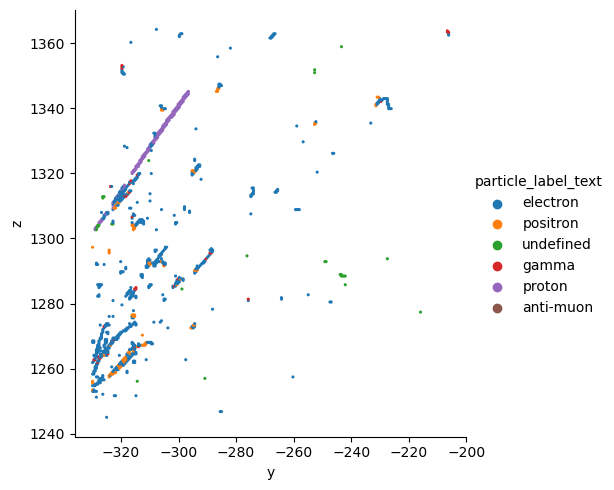

In [15]:
sn.relplot(
    data=df_3,
    x="y", y="z",
    hue="particle_label_text",
    linewidth=0,
    s=5
)
plt.show()

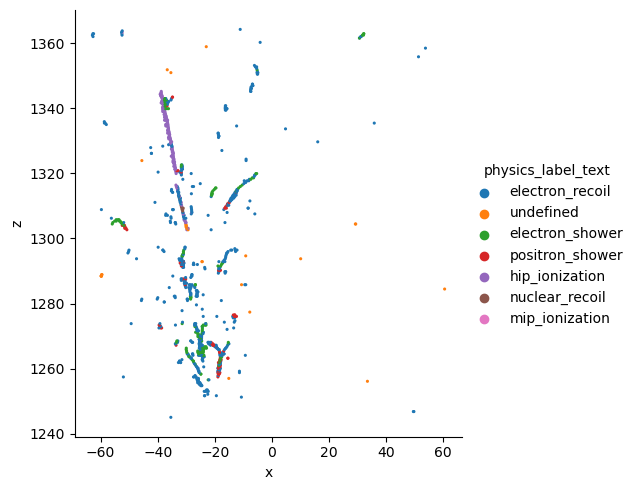

In [16]:
sn.relplot(
    data=df_3,
    x="x", y="z",
    hue="physics_label_text",
    linewidth=0,
    s=5
)
plt.show()

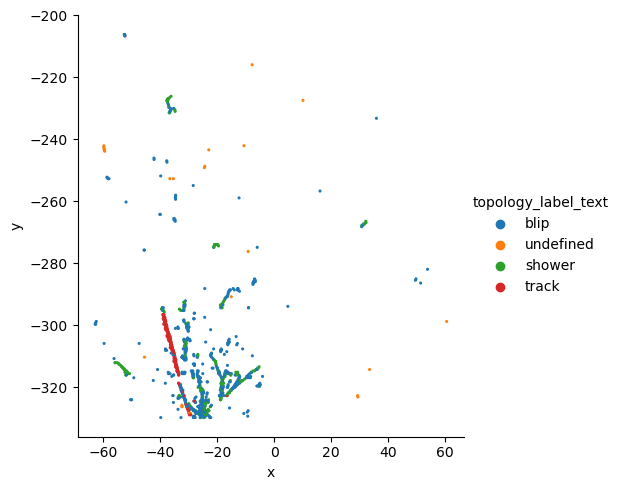

In [17]:
sn.relplot(
    data=df_3,
    x="x", y="y",
    hue="topology_label_text",
    linewidth=0,
    s=5
)
plt.show()

In [18]:
physics_labels_full = []
for i, cloud in enumerate(arr['data'].tolist()):
    physics_labels_full.append(arr['data'].tolist()[cloud].data['physics_label'])
                          

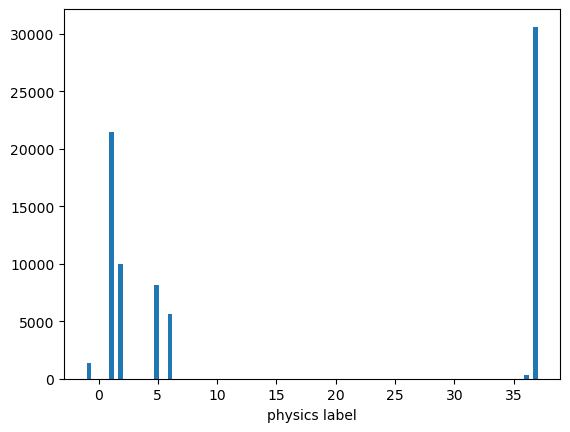

In [19]:
plt.hist([item for sublist in physics_labels_full for item in sublist], bins=100)
plt.xlabel('physics label')
plt.show()

In [20]:
particle_labels_full = []
for i, cloud in enumerate(arr['data'].tolist()):
    particle_labels_full.append(arr['data'].tolist()[cloud].data['particle_label'])

In [21]:
np.unique([item for sublist in particle_labels_full for item in sublist])

array([-2.11000000e+02, -1.30000000e+01, -1.10000000e+01, -1.00000000e+00,
        1.10000000e+01,  1.30000000e+01,  2.20000000e+01,  2.11000000e+02,
        2.11200000e+03,  2.21200000e+03,  1.00001002e+09,  1.00001003e+09,
        1.00013027e+09,  1.00013028e+09,  1.00015033e+09,  1.00016033e+09,
        1.00016034e+09,  1.00016035e+09,  1.00016036e+09,  1.00017035e+09,
        1.00017036e+09,  1.00017037e+09,  1.00017039e+09,  1.00017040e+09,
        1.00018036e+09,  1.00018037e+09,  1.00018038e+09,  1.00018039e+09,
        1.00018040e+09,  1.00019039e+09])

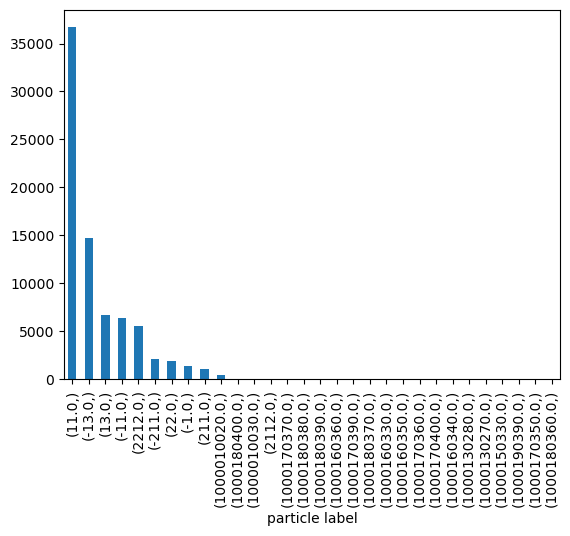

In [22]:
dd = pd.DataFrame([item for sublist in particle_labels_full for item in sublist])
dd.value_counts().plot(kind='bar')
#plt.hist([item for sublist in particle_labels_full for item in sublist], bins=np.unique([item for sublist in particle_labels_full for item in sublist]))
plt.xlabel('particle label')
#plt.xlim(-23, 23)
plt.show()

In [23]:
topology_labels_full = []
for i, cloud in enumerate(arr['data'].tolist()):
    topology_labels_full.append(arr['data'].tolist()[cloud].data['topology_label'])

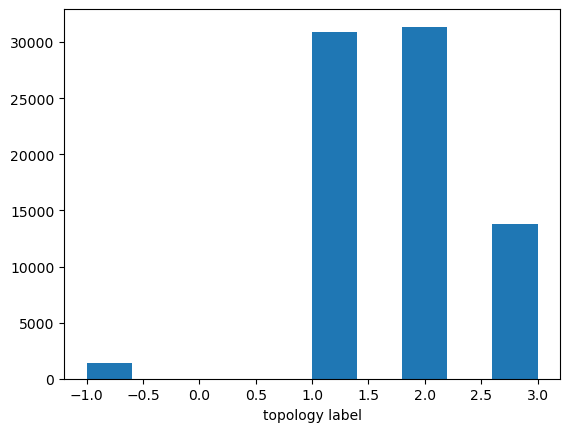

In [24]:
plt.hist([item for sublist in topology_labels_full for item in sublist])
plt.xlabel('topology label')
plt.show()